In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
pip install scanpy

In [ ]:

adata = '/content/drive/MyDrive/Datasets/dataset1.csv'

# Read the CSV file using pandas
df = pd.read_csv(adata)
df


,Unnamed: 0,PF3D7-0100100,PF3D7-0100200,PF3D7-0100300,PF3D7-0100400,PF3D7-0100500,PF3D7-0100600,PF3D7-0100700,PF3D7-0100800,PF3D7-0100900,...,PF3D7-0310600.1,PF3D7-0313700.1,PF3D7-0313700.2,PF3D7-0208100.1,PF3D7-0208700.2,PF3D7-0208700.1,PF3D7-0219400.1,PF3D7-0219400.2,PF3D7-0107000.1,stage
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,ring
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,ring
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,ring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38630,38630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.314569,0.000000,0.0,0.0,0.0,0.000000,gametocyte
38631,38631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.080796,gametocyte
38632,38632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte
38633,38633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte


In [ ]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [ ]:
pip install leidenalg


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


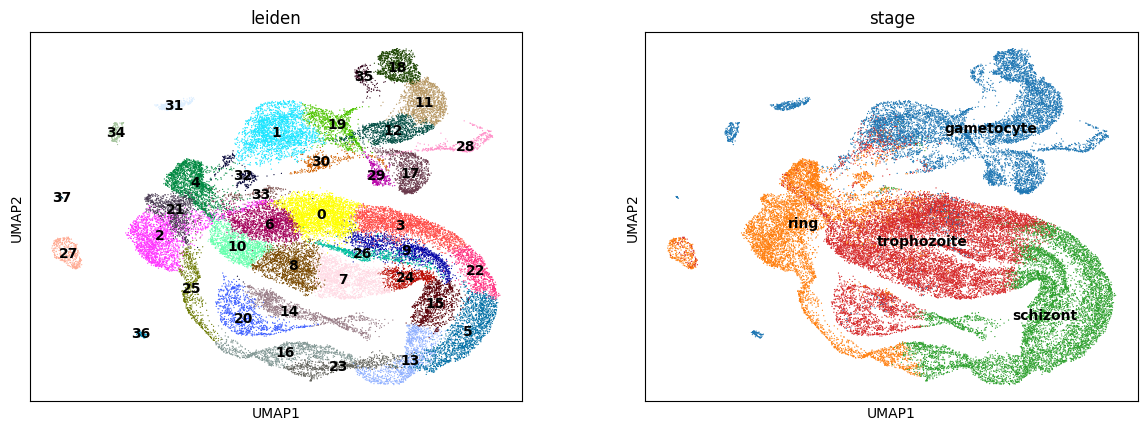

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df.iloc[:, :-1].values)
adata.obs['stage'] = df['stage'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage'], legend_loc='on data')


In [ ]:
columns_to_select = ['PF3D7-0102200',
'PF3D7-0102300',
'PF3D7-0104300',
'PF3D7-0105700',
'PF3D7-0107500',
'PF3D7-0108500',
'PF3D7-0109400',
'PF3D7-0110000',
'PF3D7-0112200',
'PF3D7-0113000',
'PF3D7-0202000',
'PF3D7-0202500',
'PF3D7-0204100',
'PF3D7-0205100',
'PF3D7-0206800',
'PF3D7-0207000',
'PF3D7-0207600',
'PF3D7-0209000',
'PF3D7-0213600',
'PF3D7-0214900',
'PF3D7-0216000',
'PF3D7-0217500',
'PF3D7-0220000',
'PF3D7-0220200',
'PF3D7-0220800',
'PF3D7-0302200',
'PF3D7-0303200',
'PF3D7-0304100',
'PF3D7-0306900',
'PF3D7-0308100',
'PF3D7-0309600',
'PF3D7-0310200',
'PF3D7-0311700',
'PF3D7-0313600',
'PF3D7-0318500',
'PF3D7-0322000',
'PF3D7-0402100',
'PF3D7-0404700',
'PF3D7-0405900',
'PF3D7-0406200',
'PF3D7-0407700',
'PF3D7-0407800',
'PF3D7-0415900',
'PF3D7-0418000',
'PF3D7-0419700',
'PF3D7-0422300',
'PF3D7-0422400',
'PF3D7-0423300',
'PF3D7-0423400',
'PF3D7-0423700',
'PF3D7-0424600',
'PF3D7-0500800',
'PF3D7-0501300',
'PF3D7-0501400',
'PF3D7-0501500',
'PF3D7-0501600',
'PF3D7-0502400',
'PF3D7-0506900',
'PF3D7-0507100',
'PF3D7-0507200',
'PF3D7-0508100',
'PF3D7-0508900',
'PF3D7-0510100',
'PF3D7-0511500',
'PF3D7-0511600',
'PF3D7-0513600',
'PF3D7-0515700',
'PF3D7-0516900',
'PF3D7-0517000',
'PF3D7-0519400',
'PF3D7-0520000',
'PF3D7-0520900',
'PF3D7-0522400',
'PF3D7-0528900',
'PF3D7-0532100',
'PF3D7-0603600',
'PF3D7-0604100',
'PF3D7-0607700',
'PF3D7-0608600',
'PF3D7-0608800',
'PF3D7-0610400',
'PF3D7-0612700',
'PF3D7-0613300',
'PF3D7-0613800',
'PF3D7-0614500',
'PF3D7-0617800',
'PF3D7-0617900',
'PF3D7-0618000',
'PF3D7-0620400',
'PF3D7-0623800',
'PF3D7-0624900',
'PF3D7-0628100',
'PF3D7-0702000',
'PF3D7-0704100',
'PF3D7-0705500',
'PF3D7-0706400',
'PF3D7-0707300',
'PF3D7-0708400',
'PF3D7-0710600',
'PF3D7-0715200',
'PF3D7-0716300',
'PF3D7-0717600',
'PF3D7-0719600',
'PF3D7-0722200',
'PF3D7-0722800',
'PF3D7-0723800',
'PF3D7-0726100',
'PF3D7-0731100',
'PF3D7-0731600',
'PF3D7-0802100',
'PF3D7-0802600',
'PF3D7-0803200',
'PF3D7-0804700',
'PF3D7-0810300',
'PF3D7-0811700',
'PF3D7-0813300',
'PF3D7-0814200',
'PF3D7-0815800',
'PF3D7-0817600',
'PF3D7-0817700',
'PF3D7-0818900',
'PF3D7-0822400',
'PF3D7-0825700',
'PF3D7-0825800',
'PF3D7-0828700',
'PF3D7-0830400',
'PF3D7-0830500',
'PF3D7-0831600',
'PF3D7-0831700',
'PF3D7-0831800',
'PF3D7-0901700',
'PF3D7-0904200',
'PF3D7-0905400',
'PF3D7-0906600',
'PF3D7-0908500',
'PF3D7-0915400',
'PF3D7-0916000',
'PF3D7-0917900',
'PF3D7-0918000',
'PF3D7-0919900',
'PF3D7-0922500',
'PF3D7-0926400',
'PF3D7-0927100',
'PF3D7-0929400',
'PF3D7-0930300',
'PF3D7-0931100',
'PF3D7-0932100',
'PF3D7-0932200',
'PF3D7-0934800',
'PF3D7-0935800',
'PF3D7-0935900',
'PF3D7-0936300',
'PF3D7-1001200',
'PF3D7-1001500',
'PF3D7-1001600',
'PF3D7-1002100',
'PF3D7-1003400',
'PF3D7-1008700',
'PF3D7-1010300',
'PF3D7-1012200',
'PF3D7-1012400',
'PF3D7-1013800',
'PF3D7-1014900',
'PF3D7-1015900',
'PF3D7-1016300',
'PF3D7-1016900',
'PF3D7-1017100',
'PF3D7-1018200',
'PF3D7-1019100',
'PF3D7-1020200',
'PF3D7-1021700',
'PF3D7-1021800',
'PF3D7-1023900',
'PF3D7-1024800',
'PF3D7-1025900',
'PF3D7-1026100',
'PF3D7-1027300',
'PF3D7-1027800',
'PF3D7-1029900',
'PF3D7-1031000',
'PF3D7-1035200',
'PF3D7-1035300',
'PF3D7-1035400',
'PF3D7-1035700',
'PF3D7-1035900',
'PF3D7-1038400',
'PF3D7-1102700',
'PF3D7-1102800',
'PF3D7-1103100',
'PF3D7-1103500',
'PF3D7-1105000',
'PF3D7-1105100',
'PF3D7-1105400',
'PF3D7-1108100',
'PF3D7-1109900',
'PF3D7-1110800',
'PF3D7-1113000',
'PF3D7-1115800',
'PF3D7-1116000',
'PF3D7-1116100',
'PF3D7-1116800',
'PF3D7-1117400',
'PF3D7-1117700',
'PF3D7-1118700',
'PF3D7-1120100',
'PF3D7-1120700',
'PF3D7-1121600',
'PF3D7-1126700',
'PF3D7-1126800',
'PF3D7-1128600',
'PF3D7-1129000',
'PF3D7-1129300',
'PF3D7-1130200',
'PF3D7-1133300',
'PF3D7-1134000',
'PF3D7-1136200',
'PF3D7-1138000',
'PF3D7-1143100',
'PF3D7-1143600',
'PF3D7-1144800',
'PF3D7-1145200',
'PF3D7-1146800',
'PF3D7-1147200',
'PF3D7-1149000',
'PF3D7-1149200',
'PF3D7-1200700',
'PF3D7-1201600',
'PF3D7-1202900',
'PF3D7-1205600',
'PF3D7-1206300',
'PF3D7-1210200',
'PF3D7-1212700',
'PF3D7-1212900',
'PF3D7-1213900',
'PF3D7-1215100',
'PF3D7-1216500',
'PF3D7-1222700',
'PF3D7-1223100',
'PF3D7-1228600',
'PF3D7-1229800',
'PF3D7-1232500',
'PF3D7-1234700',
'PF3D7-1234900',
'PF3D7-1239200',
'PF3D7-1239800',
'PF3D7-1243600',
'PF3D7-1246200',
'PF3D7-1247800',
'PF3D7-1248400',
'PF3D7-1250400',
'PF3D7-1252100',
'PF3D7-1302000',
'PF3D7-1302800',
'PF3D7-1303800',
'PF3D7-1306500',
'PF3D7-1308000',
'PF3D7-1308200',
'PF3D7-1309100',
'PF3D7-1310200',
'PF3D7-1310700',
'PF3D7-1312800',
'PF3D7-1313600',
'PF3D7-1316000',
'PF3D7-1317800',
'PF3D7-1318000',
'PF3D7-1319600',
'PF3D7-1319800',
'PF3D7-1321100',
'PF3D7-1323400',
'PF3D7-1323700',
'PF3D7-1325400',
'PF3D7-1327300',
'PF3D7-1327400',
'PF3D7-1329500',
'PF3D7-1329700',
'PF3D7-1335100',
'PF3D7-1338200',
'PF3D7-1338300',
'PF3D7-1338800',
'PF3D7-1341300',
'PF3D7-1342000',
'PF3D7-1343000',
'PF3D7-1343800',
'PF3D7-1344300',
'PF3D7-1346300',
'PF3D7-1346700',
'PF3D7-1347200',
'PF3D7-1348400',
'PF3D7-1350000',
'PF3D7-1351600',
'PF3D7-1351700',
'PF3D7-1353100',
'PF3D7-1356800',
'PF3D7-1358600',
'PF3D7-1358800',
'PF3D7-1359600',
'PF3D7-1361300',
'PF3D7-1361800',
'PF3D7-1362600',
'PF3D7-1369300',
'PF3D7-1370300',
'PF3D7-1401200',
'PF3D7-1401400',
'PF3D7-1401600',
'PF3D7-1401900',
'PF3D7-1402500',
'PF3D7-1403200',
'PF3D7-1404800',
'PF3D7-1408600',
'PF3D7-1410400',
'PF3D7-1412300',
'PF3D7-1413200',
'PF3D7-1420700',
'PF3D7-1421800',
'PF3D7-1423300',
'PF3D7-1424100',
'PF3D7-1424400',
'PF3D7-1426000',
'PF3D7-1427900',
'PF3D7-1431100',
'PF3D7-1431400',
'PF3D7-1431700',
'PF3D7-1433400',
'PF3D7-1434400',
'PF3D7-1435200',
'PF3D7-1435600',
'PF3D7-1436200',
'PF3D7-1436300',
'PF3D7-1437300',
'PF3D7-1437900',
'PF3D7-1438800',
'PF3D7-1444800',
'PF3D7-1449200',
'PF3D7-1451200',
'PF3D7-1452000',
'PF3D7-1453700',
'PF3D7-1461700',
'PF3D7-1461800',
'PF3D7-1462800',
'PF3D7-1463900',
'PF3D7-1466200',
'PF3D7-1466800',
'PF3D7-1469900',
'PF3D7-1471100',
'PF3D7-1471600',
'PF3D7-1472800',
'PF3D7-1474000',
'PF3D7-1474200',
'PF3D7-1476300',
'PF3D7-1478000', 'stage']

In [ ]:
df1 = df[columns_to_select]

         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


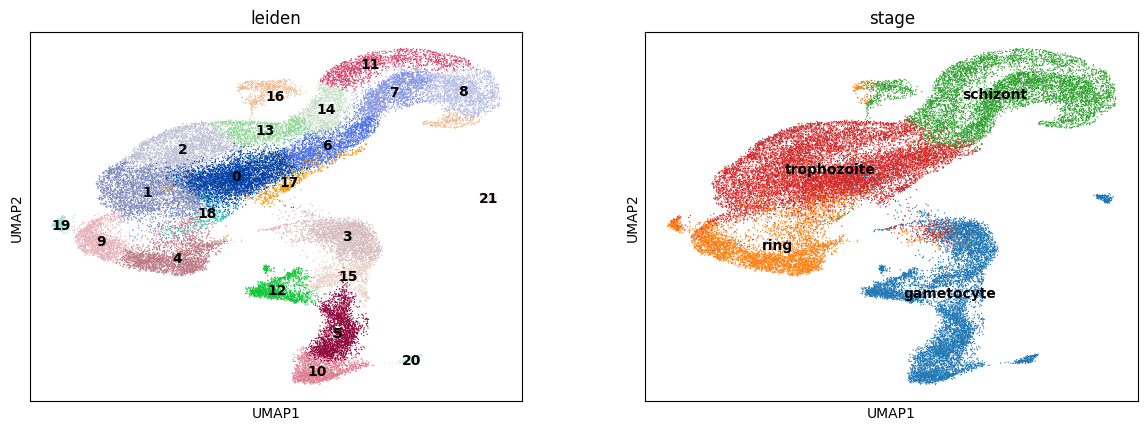

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df1.iloc[:, :-1].values)
adata.obs['stage'] = df1['stage'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage'], legend_loc='on data')


In [ ]:
adata1 = '/content/drive/MyDrive/Datasets/dataset2.csv'

# Read the CSV file using pandas
df2 = pd.read_csv(adata1)
df2

,PF3D7_0100100,PF3D7_0102100,PF3D7_0102200,PF3D7_0102300,PF3D7_0102400,PF3D7_0102500,PF3D7_0102600,PF3D7_0102800,PF3D7_0102900,PF3D7_0103000,...,PF3D7_API02900,PF3D7_API03000,PF3D7_API03500,PF3D7_API03600,PF3D7_API03800,PF3D7_API04200,PF3D7_API04300,PF3D7_API04400,PF3D7_API04500,stage
0,0.0,0.0,0.000000,0.0,0.0,0.0,1.967187,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30hpi
1,0.0,0.0,0.110161,0.0,0.0,0.0,0.000000,1.602013,1.046015,0.0,...,0.000000,0.0,0.0,1.487533,0.0,0.0,0.0,0.0,0.0,30hpi
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,1.438717,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30hpi
3,0.0,0.0,0.110161,0.0,0.0,0.0,0.000000,0.000000,1.046015,0.0,...,0.000000,0.0,0.0,1.487533,0.0,0.0,0.0,0.0,0.0,30hpi
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.046015,0.0,...,1.438717,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30hpi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi
3918,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi
3919,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi
3920,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.327061,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


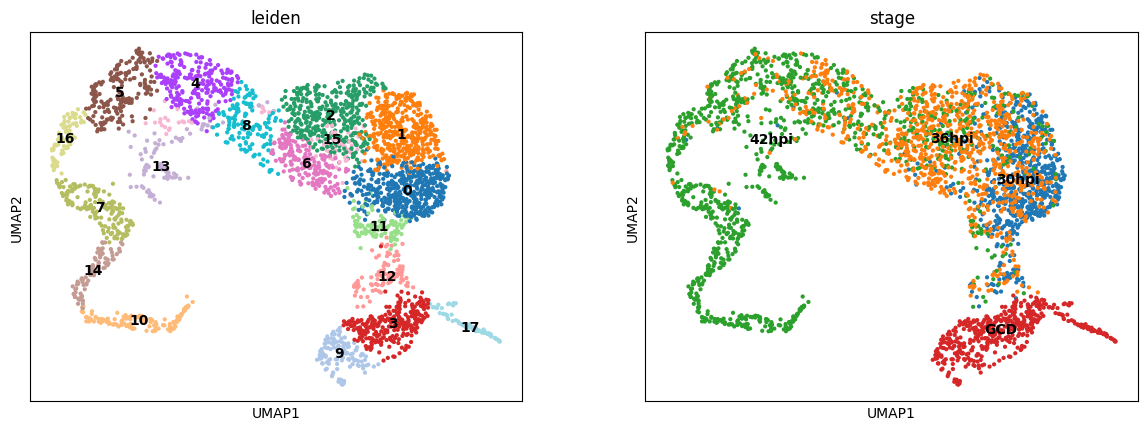

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df2.iloc[:, :-1].values)
adata.obs['stage'] = df2['stage'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage'], legend_loc='on data')


In [ ]:
columns_to_select = ['PF3D7_0102200',
'PF3D7_0102500',
'PF3D7_0104200',
'PF3D7_0104300',
'PF3D7_0105700',
'PF3D7_0114000',
'PF3D7_0203100',
'PF3D7_0204200',
'PF3D7_0206800',
'PF3D7_0207000',
'PF3D7_0207600',
'PF3D7_0209000',
'PF3D7_0213600',
'PF3D7_0214300',
'PF3D7_0214600',
'PF3D7_0214900',
'PF3D7_0216000',
'PF3D7_0217500',
'PF3D7_0220000',
'PF3D7_0220800',
'PF3D7_0305500',
'PF3D7_0308300',
'PF3D7_0316000',
'PF3D7_0318500',
'PF3D7_0320900',
'PF3D7_0323400',
'PF3D7_0402200',
'PF3D7_0402300',
'PF3D7_0403800',
'PF3D7_0404700',
'PF3D7_0406200',
'PF3D7_0407700',
'PF3D7_0407800',
'PF3D7_0407900',
'PF3D7_0410000',
'PF3D7_0418000',
'PF3D7_0418600',
'PF3D7_0420300',
'PF3D7_0422200',
'PF3D7_0424100',
'PF3D7_0424200',
'PF3D7_0424300',
'PF3D7_0500800',
'PF3D7_0508900',
'PF3D7_0515400',
'PF3D7_0521900',
'PF3D7_0522900',
'PF3D7_0525800',
'PF3D7_0602000',
'PF3D7_0603600',
'PF3D7_0605600',
'PF3D7_0609700',
'PF3D7_0610400',
'PF3D7_0613300',
'PF3D7_0613800',
'PF3D7_0613900',
'PF3D7_0617800',
'PF3D7_0617900',
'PF3D7_0620400',
'PF3D7_0624900',
'PF3D7_0628100',
'PF3D7_0628300',
'PF3D7_0704100',
'PF3D7_0707300',
'PF3D7_0708400',
'PF3D7_0718000',
'PF3D7_0720700',
'PF3D7_0722200',
'PF3D7_0724900',
'PF3D7_0725400',
'PF3D7_0726500',
'PF3D7_0729900',
'PF3D7_0730300',
'PF3D7_0731500',
'PF3D7_0802600',
'PF3D7_0804700',
'PF3D7_0805300',
'PF3D7_0806800',
'PF3D7_0810300',
'PF3D7_0817600',
'PF3D7_0822400',
'PF3D7_0822900',
'PF3D7_0828800',
'PF3D7_0831300',
'PF3D7_0903600',
'PF3D7_0905300',
'PF3D7_0905400',
'PF3D7_0911100',
'PF3D7_0914100',
'PF3D7_0929400',
'PF3D7_0930200',
'PF3D7_0930300',
'PF3D7_0932100',
'PF3D7_1001600',
'PF3D7_1003400',
'PF3D7_1003600',
'PF3D7_1014100',
'PF3D7_1021700',
'PF3D7_1023100',
'PF3D7_1023900',
'PF3D7_1024800',
'PF3D7_1026600',
'PF3D7_1027300',
'PF3D7_1028700',
'PF3D7_1029900',
'PF3D7_1035200',
'PF3D7_1035300',
'PF3D7_1035400',
'PF3D7_1035500',
'PF3D7_1035700',
'PF3D7_1035900',
'PF3D7_1036000',
'PF3D7_1036500',
'PF3D7_1038400',
'PF3D7_1102800',
'PF3D7_1104900',
'PF3D7_1105000',
'PF3D7_1105100',
'PF3D7_1116000',
'PF3D7_1116100',
'PF3D7_1116800',
'PF3D7_1122900',
'PF3D7_1125700',
'PF3D7_1125800',
'PF3D7_1126700',
'PF3D7_1136900',
'PF3D7_1143100',
'PF3D7_1145200',
'PF3D7_1146600',
'PF3D7_1146800',
'PF3D7_1147200',
'PF3D7_1149000',
'PF3D7_1149200',
'PF3D7_1202300',
'PF3D7_1202900',
'PF3D7_1206500',
'PF3D7_1210200',
'PF3D7_1215100',
'PF3D7_1216500',
'PF3D7_1217200',
'PF3D7_1222700',
'PF3D7_1223100',
'PF3D7_1228600',
'PF3D7_1229800',
'PF3D7_1232500',
'PF3D7_1235900',
'PF3D7_1237900',
'PF3D7_1238900',
'PF3D7_1246200',
'PF3D7_1246400',
'PF3D7_1251200',
'PF3D7_1252100',
'PF3D7_1252400',
'PF3D7_1301600',
'PF3D7_1306500',
'PF3D7_1310700',
'PF3D7_1311100',
'PF3D7_1321100',
'PF3D7_1327300',
'PF3D7_1331000',
'PF3D7_1332200',
'PF3D7_1335100',
'PF3D7_1335300',
'PF3D7_1335400',
'PF3D7_1337800',
'PF3D7_1341100',
'PF3D7_1342600',
'PF3D7_1343800',
'PF3D7_1344300',
'PF3D7_1351700',
'PF3D7_1356800',
'PF3D7_1358600',
'PF3D7_1361800',
'PF3D7_1370800',
'PF3D7_1401600',
'PF3D7_1401900',
'PF3D7_1410400',
'PF3D7_1413200',
'PF3D7_1413700',
'PF3D7_1421150’,
'PF3D7_1423300',
'PF3D7_1424900',
'PF3D7_1435600',
'PF3D7_1436300',
'PF3D7_1438800',
'PF3D7_1449200',
'PF3D7_1452000',
'PF3D7_1455300',
'PF3D7_1460600',
'PF3D7_1461800',
'PF3D7_1463900',
'PF3D7_1464600',
'PF3D7_1466200',
'PF3D7_1466800',
'PF3D7_1468400',
'PF3D7_1469900',
'PF3D7_1471900',
'PF3D7_1472800',
'PF3D7_1474000',
'PF3D7_1475400',
'stage'
]

In [ ]:
df3 = df2[columns_to_select]

In [ ]:
df3

,PF3D7_0102200,PF3D7_0102500,PF3D7_0104200,PF3D7_0104300,PF3D7_0105700,PF3D7_0114000,PF3D7_0203100,PF3D7_0204200,PF3D7_0206800,PF3D7_0207000,...,PF3D7_1464600,PF3D7_1466200,PF3D7_1466800,PF3D7_1468400,PF3D7_1469900,PF3D7_1471900,PF3D7_1472800,PF3D7_1474000,PF3D7_1475400,stage
0,0.000000,0.0,0.0,0.162451,0.614108,1.846245,0.000000,0.000000,0.00000,0.000000,...,0.278358,0.582127,1.201325,0.613827,0.000000,0.484832,0.889136,0.738386,0.0,30hpi
1,0.110161,0.0,0.0,0.114749,0.382878,0.000000,0.126123,1.084188,0.42272,0.000000,...,0.000000,0.179790,0.000000,0.000000,0.000000,0.632050,0.000000,0.000000,0.0,30hpi
2,0.000000,0.0,0.0,0.031652,0.328752,0.216586,0.000000,0.000000,0.00000,0.000000,...,0.223678,0.000000,0.000000,0.000000,1.206699,0.564650,0.889136,0.160619,0.0,30hpi
3,0.110161,0.0,0.0,0.000000,0.266906,0.000000,0.303396,0.000000,0.00000,0.000000,...,0.087983,0.000000,0.000000,0.000000,0.000000,0.386966,0.889136,0.000000,0.0,30hpi
4,0.000000,0.0,0.0,0.031652,0.513704,1.487748,0.526187,0.000000,0.00000,0.000000,...,0.087983,0.446366,1.380631,0.000000,0.000000,0.260428,0.000000,0.277610,0.0,30hpi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.642396,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36hpi
3918,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.081122,0.000000,0.000000,0.0,36hpi
3919,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36hpi
3920,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.087983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36hpi


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


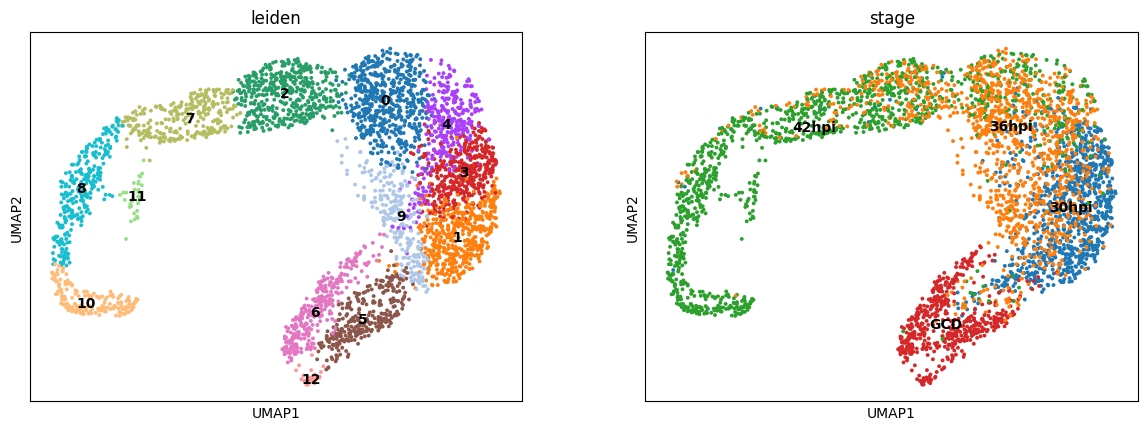

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df3.iloc[:, :-1].values)
adata.obs['stage'] = df3['stage'].values
# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=5)
sc.pp.filter_genes(adata, min_cells=100)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage'], legend_loc='on data')


In [ ]:
adata

AnnData object with n_obs × n_vars = 294 × 165
    obs: 'stage', 'n_genes'
    var: 'n_cells'
    uns: 'log1p'

In [ ]:
df3

,PF3D7_0102200,PF3D7_0102500,PF3D7_0104200,PF3D7_0104300,PF3D7_0105700,PF3D7_0114000,PF3D7_0203100,PF3D7_0204200,PF3D7_0206800,PF3D7_0207000,...,PF3D7_1464600,PF3D7_1466200,PF3D7_1466800,PF3D7_1468400,PF3D7_1469900,PF3D7_1471900,PF3D7_1472800,PF3D7_1474000,PF3D7_1475400,stage
0,0.000000,0.0,0.0,0.162451,0.614108,1.846245,0.000000,0.000000,0.00000,0.000000,...,0.278358,0.582127,1.201325,0.613827,0.000000,0.484832,0.889136,0.738386,0.0,30hpi
1,0.110161,0.0,0.0,0.114749,0.382878,0.000000,0.126123,1.084188,0.42272,0.000000,...,0.000000,0.179790,0.000000,0.000000,0.000000,0.632050,0.000000,0.000000,0.0,30hpi
2,0.000000,0.0,0.0,0.031652,0.328752,0.216586,0.000000,0.000000,0.00000,0.000000,...,0.223678,0.000000,0.000000,0.000000,1.206699,0.564650,0.889136,0.160619,0.0,30hpi
3,0.110161,0.0,0.0,0.000000,0.266906,0.000000,0.303396,0.000000,0.00000,0.000000,...,0.087983,0.000000,0.000000,0.000000,0.000000,0.386966,0.889136,0.000000,0.0,30hpi
4,0.000000,0.0,0.0,0.031652,0.513704,1.487748,0.526187,0.000000,0.00000,0.000000,...,0.087983,0.446366,1.380631,0.000000,0.000000,0.260428,0.000000,0.277610,0.0,30hpi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.642396,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36hpi
3918,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.081122,0.000000,0.000000,0.0,36hpi
3919,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36hpi
3920,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.087983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36hpi


In [ ]:

adata = '/content/drive/MyDrive/Datasets/dataset3.csv'

# Read the CSV file using pandas
df4 = pd.read_csv(adata)
df4


,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100400,PF3D7_0100500,PF3D7_0100600,PF3D7_0100700,PF3D7_0100800,PF3D7_0100900,PF3D7_0101000,...,PF3D7_0511600,PF3D7_0511700,PF3D7_0511800,PF3D7_0511900,PF3D7_0512000,PF3D7_0512100,PF3D7_0512200,PF3D7_0512300,PF3D7_0512400,stage1
0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.964260,0.0,3.092721,1.491362,0.0,0.000000,0.000000,T0
1,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.691965,0.0,2.440909,0.954243,0.0,0.000000,0.000000,T0
2,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.380392,0.0,2.821514,0.778151,0.0,0.000000,0.000000,T0
3,0.477121,0.0,0.69897,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.910624,0.0,0.477121,0.000000,0.0,0.000000,0.000000,T0
4,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.778151,0.0,2.690196,1.204120,0.0,0.000000,0.000000,T0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,3.424555,1.690196,0.0,0.000000,3.258637,T20
121,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.477121,0.0,0.301030,0.000000,0.0,0.000000,3.720986,T20
122,0.301030,0.0,0.00000,2.041393,0.60206,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.186108,0.0,0.000000,0.000000,0.0,0.477121,3.141136,T20
123,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.710117,0.0,0.000000,0.000000,0.0,0.000000,3.498999,T20


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


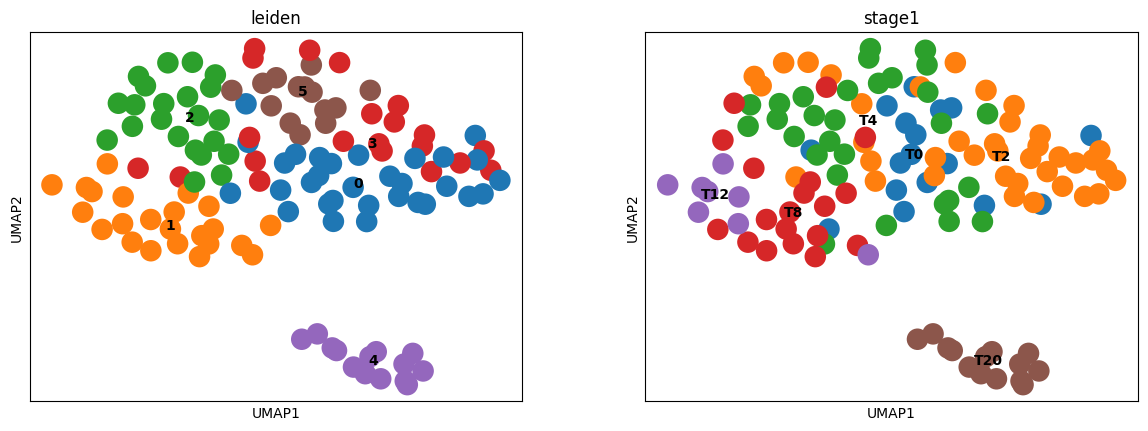

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df4.iloc[:, :-1].values)
adata.obs['stage1'] = df4['stage1'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=15)
sc.pp.filter_genes(adata, min_cells=35)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage1'], legend_loc='on data')


In [ ]:
columns_to_select =['PF3D7_0100700',
'PF3D7_0100800',
'PF3D7_0101100',
'PF3D7_0101300',
'PF3D7_0103000',
'PF3D7_0103100',
'PF3D7_0103600',
'PF3D7_0103700',
'PF3D7_0104000',
'PF3D7_0105000',
'PF3D7_0105600',
'PF3D7_0105700',
'PF3D7_0106500',
'PF3D7_0107100',
'PF3D7_0108100',
'PF3D7_0108600',
'PF3D7_0108800',
'PF3D7_0109100',
'PF3D7_0109300',
'PF3D7_0109400',
'PF3D7_0109850',
'PF3D7_0109950',
'PF3D7_0111000',
'PF3D7_0111200',
'PF3D7_0112100',
'PF3D7_0112300',
'PF3D7_0112400',
'PF3D7_0112700',
'PF3D7_0113200',
'PF3D7_0113800',
'PF3D7_0114200',
'PF3D7_0114500',
'PF3D7_0115100',
'PF3D7_0115500',
'PF3D7_0200500',
'PF3D7_0200800',
'PF3D7_0201800',
'PF3D7_0202600',
'PF3D7_0202900',
'PF3D7_0203100',
'PF3D7_0203300',
'PF3D7_0203400',
'PF3D7_0204200',
'PF3D7_0204700',
'PF3D7_0205600',
'PF3D7_0206200',
'PF3D7_0206500',
'PF3D7_0206700',
'PF3D7_0207100',
'PF3D7_0207500',
'PF3D7_0207900',
'PF3D7_0208700',
'PF3D7_0209100',
'PF3D7_0209500',
'PF3D7_0209600',
'PF3D7_0210500',
'PF3D7_0210600',
'PF3D7_0210700',
'PF3D7_0210900',
'PF3D7_0211200',
'PF3D7_0212300',
'PF3D7_0212600',
'PF3D7_0213100',
'PF3D7_0213600',
'PF3D7_0214600',
'PF3D7_0214700',
'PF3D7_0214900',
'PF3D7_0215200',
'PF3D7_0215600',
'PF3D7_0216000',
'PF3D7_0216100',
'PF3D7_0216500',
'PF3D7_0216700',
'PF3D7_0217000',
'PF3D7_0217100',
'PF3D7_0217500',
'PF3D7_0217600',
'PF3D7_0218000',
'PF3D7_0218400',
'PF3D7_0218800',
'PF3D7_0219500',
'PF3D7_0219600',
'PF3D7_0220600',
'PF3D7_0220900',
'PF3D7_0221900',
'PF3D7_0222100',
'PF3D7_0302700',
'PF3D7_0303200',
'PF3D7_0303700',
'PF3D7_0303800',
'PF3D7_0303900',
'PF3D7_0304100',
'PF3D7_0304500',
'PF3D7_0304800',
'PF3D7_0305100',
'PF3D7_0305200',
'PF3D7_0305300',
'PF3D7_0305500',
'PF3D7_0305600',
'PF3D7_0305700',
'PF3D7_0306200',
'PF3D7_0306900',
'PF3D7_0307400',
'PF3D7_0308100',
'PF3D7_0308700',
'PF3D7_0309200',
'PF3D7_0309400',
'PF3D7_0309500',
'PF3D7_0309600',
'PF3D7_0309800',
'PF3D7_0309900',
'PF3D7_0310100',
'PF3D7_0310200',
'PF3D7_0310900',
'PF3D7_0311000',
'PF3D7_0311200',
'PF3D7_0311400',
'PF3D7_0311600',
'PF3D7_0311700',
'PF3D7_0312100',
'PF3D7_0312700',
'PF3D7_0312800',
'PF3D7_0313000',
'PF3D7_0313500',
'PF3D7_0313900',
'PF3D7_0314000',
'PF3D7_0314200',
'PF3D7_0314500',
'PF3D7_0315200',
'PF3D7_0315300',
'PF3D7_0315600',
'PF3D7_0316200',
'PF3D7_0316800',
'PF3D7_0317000',
'PF3D7_0317800',
'PF3D7_0317900',
'PF3D7_0318000',
'PF3D7_0318200',
'PF3D7_0318300',
'PF3D7_0318400',
'PF3D7_0320000',
'PF3D7_0320400',
'PF3D7_0320500',
'PF3D7_0320700',
'PF3D7_0321100',
'PF3D7_0321500',
'PF3D7_0321900',
'PF3D7_0322100',
'PF3D7_0322300',
'PF3D7_0322700',
'PF3D7_0323000',
'PF3D7_0323100',
'PF3D7_0323300',
'PF3D7_0400300',
'PF3D7_0401200',
'PF3D7_0401700',
'PF3D7_0403600',
'PF3D7_0404000',
'PF3D7_0404200',
'PF3D7_0405000',
'PF3D7_0405300',
'PF3D7_0405400',
'PF3D7_0405500',
'PF3D7_0406900',
'PF3D7_0407100',
'PF3D7_0407200',
'PF3D7_0407300',
'PF3D7_0407800',
'PF3D7_0408000',
'PF3D7_0408500',
'PF3D7_0408800',
'PF3D7_0408900',
'PF3D7_0409200',
'PF3D7_0409300',
'PF3D7_0409500',
'PF3D7_0409700',
'PF3D7_0410000',
'PF3D7_0410600',
'PF3D7_0410700',
'PF3D7_0411200',
'PF3D7_0411300',
'PF3D7_0411900',
'PF3D7_0412200',
'PF3D7_0412400',
'PF3D7_0413600',
'PF3D7_0413900',
'PF3D7_0414000',
'PF3D7_0414100',
'PF3D7_0414300',
'PF3D7_0414400',
'PF3D7_0415100',
'PF3D7_0416000',
'PF3D7_0416300',
'PF3D7_0416500',
'PF3D7_0416700',
'PF3D7_0416900',
'PF3D7_0417100',
'PF3D7_0417200',
'PF3D7_0417300',
'PF3D7_0418000',
'PF3D7_0418200',
'PF3D7_0418700',
'PF3D7_0418900',
'PF3D7_0419000',
'PF3D7_0419400',
'PF3D7_0419600',
'PF3D7_0420300',
'PF3D7_0420600',
'PF3D7_0421500',
'PF3D7_0421600',
'PF3D7_0421700',
'PF3D7_0421900',
'PF3D7_0422100',
'PF3D7_0422900',
'PF3D7_0423200',
'PF3D7_0423300',
'PF3D7_0423600',
'PF3D7_0423800',
'PF3D7_0424000',
'PF3D7_0424100',
'PF3D7_0424900',
'PF3D7_0500700',
'PF3D7_0501200',
'PF3D7_0501600',
'PF3D7_0502000',
'PF3D7_0503000',
'PF3D7_0503200',
'PF3D7_0503400',
'PF3D7_0504500',
'PF3D7_0504900',
'PF3D7_0505100',
'PF3D7_0505300',
'PF3D7_0505400',
'PF3D7_0506500',
'PF3D7_0506800',
'PF3D7_0506900',
'PF3D7_0507000',
'PF3D7_0507100',
'PF3D7_0507200',
'PF3D7_0507300',
'PF3D7_0507400',
'PF3D7_0507800',
'PF3D7_0508200',
'PF3D7_0508400',
'PF3D7_0508700',
'PF3D7_0508900',
'PF3D7_0509000',
'PF3D7_0509800',
'PF3D7_0510200',
'PF3D7_0510700',
'PF3D7_0510800',
'PF3D7_0510900',
'PF3D7_0511000',
'PF3D7_0511100',
'PF3D7_0511200',
'PF3D7_0511400',
'PF3D7_0511600',
'PF3D7_0511800',
'PF3D7_0512000',
'PF3D7_0512400',
'stage1']

In [ ]:
df5 = df4[columns_to_select]

         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


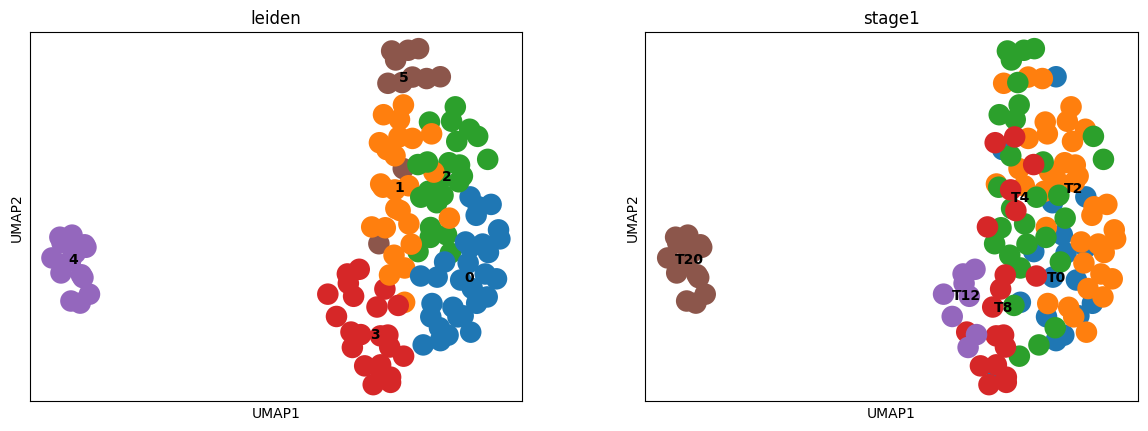

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df5.iloc[:, :-1].values)
adata.obs['stage1'] = df5['stage1'].values
# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=15)
sc.pp.filter_genes(adata, min_cells=35)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage1'], legend_loc='on data')
